<p></p>
<div style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<font color=#f87d5b size=10>
حل تمارین عملی سری سوم
        </font>
		<hr>
        <b>متن گزارش در محیط ژوپیتر محلی (local) به درستی نمایش داده می‌شود، ولی ممکن است روی گوگل کولب مشکل داشته باشد.</b>
        <br>
        پیش از هر چیز کتابخانه‌های مورد نیاز را ایمپورت می‌کنیم:

In [43]:
import numpy as np
import matplotlib.pyplot as plt

<p></p>
<div style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<font color=#f87d5b size=6>
حل تمرین ۳
        </font>
		<hr>
		<b>قسمت الف)</b> ابتدا پارامتر <code>r</code>، تلورانس خطا و تعداد مجهول‌های دستگاه را به ترتیب تعریف می‌کنیم:
	</font>
</div>

In [2]:
r = 0.25
epsilon = 0.5e-12
n = 100

<p></p>
<div style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<p></p>
		حال ماتریس \( A \) را همان طور که در صورت سوال به ما داده شده با پارامتر <code>r</code> ایجاد می‌کنیم:
	</font>
</div>

In [3]:
A = (1 + 2 * r) * np.eye(100) + (-r) * np.eye(n, k=1) + (-r) * np.eye(n, k=-1)

<p></p>
<div style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<p></p>
        در گام بعدی بردار $b$ و بردار اولیه‌ی $X_0$ را مطابق صورت سوال تعریف می‌کنیم:
	</font>
</div>

In [4]:
b = np.ones(n)
X_0 = np.zeros(n)

<p></p>
<div style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<p></p>
        الگوریتم ژاکوبی با فرم ماتریسی و محک توقف \( \max_i \| x_i^{(k)} - x_i^{(k - 1)} \| \leq \epsilon \) پیاده‌سازی شده است که \( \epsilon \) همان تلورانس خطاست.
	</font>
</div>

In [5]:
def jacobi(A, b, X_0, epsilon):
    U = np.triu(A, k=1)
    L = np.tril(A, k=-1)
    D = np.diag(np.diag(A))

    X = X_0
    num_iterations = 0
    while True:
        X_prev = X
        X = -np.linalg.inv(D) @ (L + U) @ X + np.linalg.inv(D) @ b
        num_iterations += 1
        if np.linalg.norm(X - X_prev, np.inf) <= epsilon:
            break

    return X, num_iterations

<p></p>
<div style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<p></p>
        حال این الگوریتم را با پارامترهای مشخص شده روی دستگاه مورد نظر اجرا کرده و از نتایج خروجی می‌گیریم:
	</font>
</div>

In [22]:
X_jacobi, num_iterations_jacobi = jacobi(A, b, X_0, epsilon)
print(f'AX = b solved using Jacobi method with {num_iterations_jacobi} iterations:')
X_jacobi

AX = b solved using Jacobi method with 27 iterations:


array([0.82842712, 0.97056275, 0.99494937, 0.99913345, 0.99985132,
       0.99997449, 0.99999562, 0.99999925, 0.99999987, 0.99999998,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

<p></p>
<div style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<hr>
		<b>قسمت ب)</b> به طور مشابه فرم ماتریسی الگوریتم گاوس-سایدل را پیاده‌سازی کرده و از نتیجه خروجی می‌گیریم:
	</font>
</div>

In [12]:
def gauss_seidel(A, b, X_0, epsilon):
    U = np.triu(A, k=1)
    L = np.tril(A, k=-1)
    D = np.diag(np.diag(A))

    X = X_0
    num_iterations = 0
    while True:
        X_prev = X
        X = -np.linalg.inv(L + D) @ U @ X + np.linalg.inv(L + D) @ b
        num_iterations += 1
        if np.linalg.norm(X - X_prev, np.inf) <= epsilon:
            break

    return X, num_iterations

In [21]:
X_gauss_seidel, num_iterations_gauss_seidel = gauss_seidel(A, b, X_0, epsilon)
print(f'AX = b solved using Gauss_Seidel method with {num_iterations_gauss_seidel} iterations:')
X_gauss_seidel

AX = b solved using Gauss_Seidel method with 19 iterations:


array([0.82842712, 0.97056275, 0.99494937, 0.99913345, 0.99985132,
       0.99997449, 0.99999562, 0.99999925, 0.99999987, 0.99999998,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

<p></p>
<div style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<hr>
		<b>قسمت ت)</b> این بار با استفاده از الگوریتم توماس این دستگاه را حل کرده و از نتیجه خروجی می‌گیریم:
	</font>
</div>

In [14]:
def thomas(A, f):
    # initializing arrays of coefficients
    n = A.shape[0]
    alpha = np.empty(n)
    beta = np.empty(n)
    y = np.empty(n)
    x = np.empty(n)

    # calculating coefficients alpha's and beta's
    alpha[0] = A[0][0]
    for i in range(1, n):
        beta[i] = A[i][i - 1] / alpha[i - 1]
        alpha[i] = A[i][i] - beta[i] * A[i - 1][i]
    
    # calculating y_i's
    y[0] = f[0]
    for i in range(1, n):
        y[i] = f[i] - beta[i] * y[i - 1]
    
    # calculating the result
    x[n - 1] = y[n - 1] / alpha[n - 1]
    for i in range(n - 2, -1, -1):
        x[i] = (y[i] - A[i][i + 1] * x[i + 1]) / alpha[i]
    
    return x

In [19]:
X_thomas = thomas(A, b)
print(f'AX = b solved using Thomas algorithm:')
X_thomas

AX = b solved using Thomas algorithm:


array([0.82842712, 0.97056275, 0.99494937, 0.99913345, 0.99985132,
       0.99997449, 0.99999562, 0.99999925, 0.99999987, 0.99999998,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

<p></p>
<div style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<hr>
        <b>قسمت ث)</b> در این قسمت دستگاه را با الگوریتم آماده‌ی کتابخانه <code>NumPy</code> حل می‌کنیم:
	</font>
</div>

In [20]:
X_numpy = np.linalg.solve(A, b)
print(f'AX = b solved using NumPy algorithm:')
X_numpy

AX = b solved using NumPy algorithm:


array([0.82842712, 0.97056275, 0.99494937, 0.99913345, 0.99985132,
       0.99997449, 0.99999562, 0.99999925, 0.99999987, 0.99999998,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

<p></p>
<div style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<p></p>
        حال زمان اجرای هر الگوریتم را روی دستگاه محاسبه می‌کنیم:
	</font>
</div>

In [23]:
%timeit jacobi(A, b, X_0, epsilon)

10.8 ms ± 620 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [24]:
%timeit gauss_seidel(A, b, X_0, epsilon)

8.19 ms ± 394 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [25]:
%timeit thomas(A, b)

239 µs ± 16.5 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [26]:
%timeit np.linalg.solve(A, b)

80.7 µs ± 1.35 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


<p></p>
<div style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<p></p>
        همان طور که مشهود است تابع آماده نامپای عملکرد بهتری نیست به همه‌ی قسمت‌ها دارد. بعد از آن الگوریتم تماس که در فصل دوم معرفی شد بهترین عملکرد را داشته و کم‌سرعت‌ترین الگوریتمها نیز گاوس-سایدل و ژاکوبی هستند.
	</font>
</div>

<p></p>
<div style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<font color=#f87d5b size=6>
حل تمرین ۴
        </font>
		<hr>
		<b>قسمت الف)</b> ابتدا الگوریتم ژاکوبی را ولی این بار با فرم ماتریسی آن پیاده‌سازی می‌کنیم
	</font>
</div>

In [29]:
def jacobi_matrix_form(A, b, T_0, epsilon):
    U = np.triu(A, k=1)
    L = np.tril(A, k=-1)
    D = np.diag(np.diag(A))

    T = T_0
    num_iterations = 0
    while True:
        T_prev = T
        T = -np.linalg.inv(D) @ (L + U) @ T + np.linalg.inv(D) @ b
        num_iterations += 1
        if np.linalg.norm(T - T_prev, np.inf) <= epsilon:
            break

    return T, num_iterations

<p></p>
<div style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<p></p>
        در ادامه ماتریس $A$، بردار $b$ و بردار حدس اولیه $T_0$ و همچنین تلورانس را تعریف می‌کنیم.
	</font>
</div>

In [30]:
A = np.array([[4, -1, 0, -1],
              [-1, 4, -1, 0],
              [0, -1, 4, -1],
              [-1, 0, -1, 4]])

In [31]:
T_outside = 0
b = np.array([T_outside + 5, 10, 10, T_outside + 5])

In [32]:
T_0 = np.array([0, 0, 0, 0])
epsilon = 1e-3

<p></p>
<div style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<p></p>
        در ادامه بردار جواب $T$ را به همراه تعداد تکرارهای روش ژاکوبی خروجی می‌گیریم:
	</font>
</div>

In [34]:
T, repeats = jacobi_matrix_form(A, b, T_0, epsilon)
print(f'room temperatures after {repeats} repeats:\n{T}')

room temperatures after 12 repeats:
[3.12408447 4.37408447 4.37408447 3.12408447]


<p></p>
<div style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<p></p>
        چون در معادلات اول و آخر ضرایب $T_1$ و $T_4$ بیشتر است، اتاقهای اول و چهارم بیشتر تحت تاثیر دمای خارجی قرار می‌گیرند که البته چون $T_{\text{outside}} + 5 < 10$ انتظار داریم دمای اتاقهای دوم و سوم بیشتر از اتاقهای اول و چهارم باشد که این اتفاق هم افتاده است. 
        <br>
        حال با تغییر دمای خارج به $-5$، پاسخ را محاسبه می‌کنیم:
	</font>
</div>

In [36]:
T_outside = -5
b = np.array([T_outside + 5, 10, 10, T_outside + 5])

In [37]:
T, repeats = jacobi_matrix_form(A, b, T_0, epsilon)
print(f'room temperatures after {repeats} repeats:\n{T}')

room temperatures after 12 repeats:
[1.24938965 3.74938965 3.74938965 1.24938965]


<p></p>
<div style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<p></p>
        با کاهش دمای خارج همان طور که انتظار داریم دمای اتاقهای اول و چهارم نیز کاهش قابل توجهی دارد.
        با این حال نیازی به تغییر استراتژی نیست، چراکه همگرایی در هر دو قسمت و به ازای دماهای متمایز خارج رخ داده و مستقل از بردار ثوابت و لذا دمای خارج است.
    </font>
</div>

<p></p>
<div style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<font color=#f87d5b size=6>
حل تمرین ۵
        </font>
		<hr>
		<b>قسمت ب)</b> ابتدا تابعی برای ایجاد ماتریس $M_{SOR}(\omega)$ به ازای $\omega$های مختلف تعریف می‌کنیم:
	</font>
</div>

In [38]:
def MSOR(omega):
    M = np.array([[1 - omega, -omega],
                  [omega * (2 * omega - 2), omega ** 2 - omega + 1]])
    return M

<p></p>
<div style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<p></p>
        سپس بازه‌ی خواسته شده برای تغییرات $\omega$ را تعریف می‌کنیم:
	</font>
</div>

In [39]:
omega_values = np.arange(0.01, 1.99, 0.01)

<p></p>
<div style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<p></p>
        همچنین بردار زیر را برای ذخیره مقادیر $\rho(M_{SOR}(\omega))$ به ازای هر $\omega$ متناظر تعریف می‌کنیم:
	</font>
</div>

In [40]:
spectral_radii = []

<p></p>
<div style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<p></p>
        به ازای هر $\omega$ مقدار $\rho(M_{SOR}(\omega))$ را محاسبه کرده و در بردار فوق ذخیره می‌کنیم:
	</font>
</div>

In [41]:
for omega in omega_values:
    MSOR_matrix = MSOR(omega)
    spectral_radius = np.max(np.abs(np.linalg.eigvals(MSOR_matrix)))
    spectral_radii.append(spectral_radius)

<p></p>
<div style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<p></p>
        آنگاه نمودار $\omega$ در مقابل $\rho(M_{SOR}(\omega))$ را رسم می‌کنیم:
	</font>
</div>

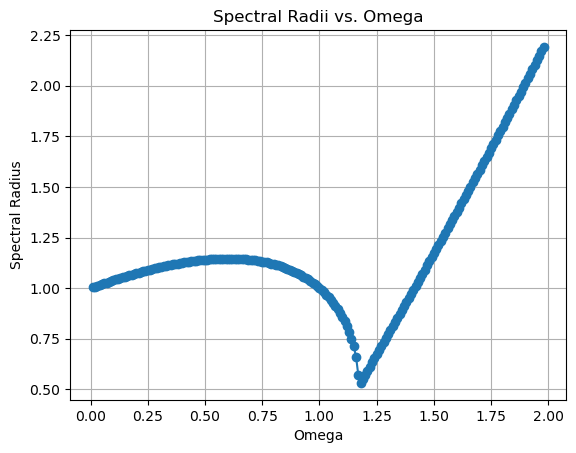

In [44]:
plt.plot(omega_values, spectral_radii, marker='o')
plt.title('Spectral Radii vs. Omega')
plt.xlabel('Omega')
plt.ylabel('Spectral Radius')
plt.grid(True)

<p></p>
<div style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<hr>
        <b>قسمت ج)</b> بیشترین مقدار شعاع طیفی برابر
	</font>
</div>

In [46]:
min_spectral_radius = np.min(spectral_radii)
min_spectral_radius

0.5320075187438613

<p></p>
<div style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<p></p>
        بوده و اندیس ماتناظر آن در بردار <code>spectral_radii</code> برابر
	</font>
</div>

In [47]:
min_spectral_radius_index = np.argmin(spectral_radii)
min_spectral_radius_index

117

<p></p>
<div style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<p></p>
        است که به ازای $\omega$ برابر با
	</font>
</div>

In [49]:
corresponding_omega = omega_values[min_spectral_radius_index]
corresponding_omega

1.18

<p></p>
<div style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<p></p>
        به دست می‌آید.
	</font>
</div>